In [1]:
# Cloning the required files from git directly to avoid pain
!git clone https://github.com/ahmedtarek-/Deep-Q-Learning.git
!cp -r Deep-Q-Learning/* .
!ls

Cloning into 'Deep-Q-Learning'...
remote: Enumerating objects: 187, done.
remote: Counting objects: 100% (187/187), done.
remote: Compressing objects: 100% (130/130), done.
remote: Total 187 (delta 98), reused 131 (delta 52), pack-reused 0
Receiving objects: 100% (187/187), 341.68 KiB | 6.83 MiB/s, done.
Resolving deltas: 100% (98/98), done.
Deep-Q-Learning  notebooks  requirements.txt  sample_data
gym_grid	 README.md  results	      training


In [2]:
# Install required packages
!pip install -q gym==0.15.4
!pip install -q pycolab==1.2
!pip install -q torch==1.2.0
# !pip install -q matplotlib==3.1.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 6.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 11.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
distributed 2022.12.1 requires cloudpickle>=1.5.0, but you have cloudpickle 1.2.2 which is incompatible.
tensorflow-probability 0.20.1 requires cloudpickle>=1.3, but you have cloudpickle 1.2.2 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.7/165.7 kB 1.8 MB/s eta 0:00:00
ERROR: Could not find a version that satisfies the requirement torch==1.2.0 (from versions: 1.11.0, 1.12.0, 1.12.1, 1.13.0, 1.13.1, 2.0.0, 2.0.1)
ERROR: No matching distribution found for torch==1.2.0


In [2]:
# Adding /training to sys path
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('../training/')

## A) Simulating the `main.py` file

### 1. Imports and load config

In [30]:
%load_ext autoreload
%autoreload 2

import yaml
from trainer import Trainer
from result import Result

import gym
import gym_grid

# with open('../training/config_2d_grid.yaml') as f:
#   config = yaml.safe_load(f)['training_config']

with open('../training/config.yaml') as f:
  config = yaml.safe_load(f)['training_config']

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [25]:
config
# # Adjust config
# config['env_name'] = "DeadlyGrid-v0"
# config['num_update_steps'] = 1000000
# config['eval_steps'] = 500
# config['debug'] = True
# config['exp_replay'] = True

{'learning_rate': 0.001,
 'exp_replay': True,
 'env_name': 'LinearTrack-v0',
 'num_update_steps': 50000,
 'eval_steps': 500,
 'debug': True}

### 2. Trainer and the loop

In [31]:
# loop_params = {
#     'num_update_steps': 5000,
#     'eval_steps': 20,
#     'debug': True
# }

trainer = Trainer(env_name=config["env_name"])

# 4. Run a training loop
training_rewards, training_discounted_rewards = trainer.the_loop(**config)

Intermediate reward at idx 0 update is 0
Discounted reward at idx 0 update is 0.0

======= Debug =========
num_update_steps:  50000
counter:  0
evaluate_at:  500
======= End Debug =========
Intermediate reward at idx 1 update is 10000
Discounted reward at idx 1 update is 9900.0

======= Debug =========
num_update_steps:  50000
counter:  500
evaluate_at:  500
======= End Debug =========
Intermediate reward at idx 2 update is 0
Discounted reward at idx 2 update is 0.0

======= Debug =========
num_update_steps:  50000
counter:  1000
evaluate_at:  500
======= End Debug =========
Intermediate reward at idx 3 update is 700
Discounted reward at idx 3 update is 693.0

======= Debug =========
num_update_steps:  50000
counter:  1500
evaluate_at:  500
======= End Debug =========
Intermediate reward at idx 4 update is 700
Discounted reward at idx 4 update is 693.0

======= Debug =========
num_update_steps:  50000
counter:  2000
evaluate_at:  500
======= End Debug =========
Intermediate reward at i

### 3. Calling Result

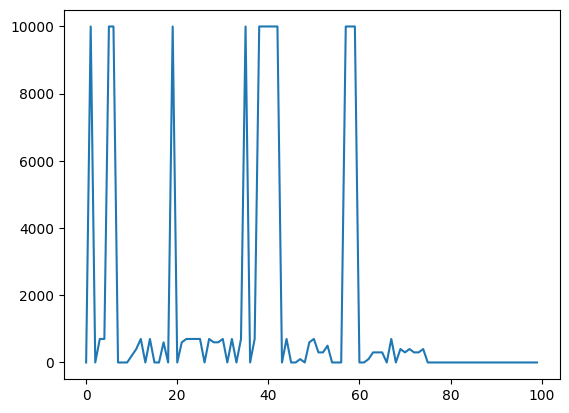

In [32]:
Result(
  model=trainer.model,
  rewards=training_rewards,
  disc_rewards=training_discounted_rewards,
  env_name=config["env_name"]).save(plot=True)

### 4. Running our simulation

#### 4.1 Method to load env

In [11]:
import torch
import numpy as np
from mlp import MLP

import matplotlib.pyplot as plt
from IPython import display

def load_model_env(env, path_to_model):
    states = np.prod(env.observation_space.shape)
    actions = env.action_space.n

    m_load = MLP(states, actions)
    m_load.load_state_dict(torch.load(path_to_model))

    return m_load

#### 4.2 Method to visualise

In [12]:
def run_trained_model_visual(env, model, num_steps = 20):
    current_state, obs_to_render = env.reset_with_render()
    env.render(obs_to_render)
    rew_total = 0

    # put the model in inference mode
    model.eval()
    done = False

    for _ in range(num_steps):
        action = torch.argmax(model(torch.Tensor(current_state.flatten()))).item()
        current_state, rew , done, _, obs_to_render = env.step_with_render(action)
        env.render(obs_to_render)
        display.display(plt.gcf())
        display.clear_output(wait=True)
        rew_total += rew

        if done:
            break

    print(f"The total reward in this episode is: {rew_total}")

#### 4.3 Testing the mf

The total reward in this episode is: 0


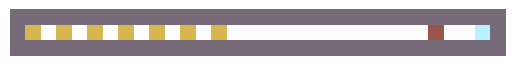

In [37]:
env_linear = gym.make("LinearTrack-v0")
env_2d = gym.make("DeadlyGrid-v0")

model = load_model_env(env_linear, "../results/models/1d_track/28_07_2023-14:35_model_gamma_1.pt")

run_trained_model_visual(env_linear, model, num_steps = 20)

The total reward in this episode is: 1400


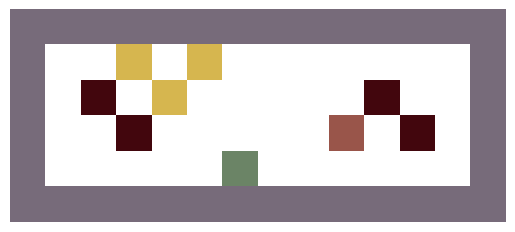

In [27]:
model = load_model_env(env_2d, "../results/models/2d_track/28_07_2023-13:40_model_1M_steps_no_exp_replay.pt")

run_trained_model_visual(env_2d, model, num_steps = 40)

/home/galan/anaconda3/envs/rl/lib/python3.8/site-packages/pycolab/ascii_art.py:318: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  art = np.vstack(np.fromstring(line, dtype=np.uint8) for line in art)


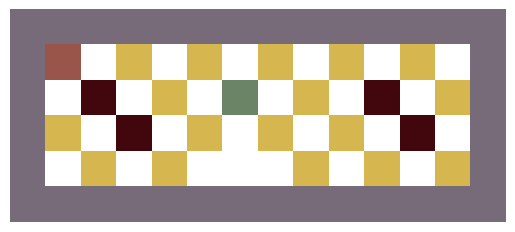

In [20]:
current_state, obs_to_render = env_2d.reset_with_render()
env_2d.render(obs_to_render)